# Questões  <a name="questoes"></a>
1. [Carregando a base e verificando duplicações](#lendo)
2. [Categorize](#categorize)
3. [Monte um gráfico](#grafico)
4. [Monte uma tabela](#tabela)
5. [Distribuição da variável APGAR5 para cada classe de GESTACAO](#percent)
6. [Hipoteses](#insght)
7. [Veja se há relação entre APGAR5 e o peso do bebê](#relacao)

In [2]:
"""
Importando as bibliotecas
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Base de nascidos vivos do DataSUS

### 1. Carregando a base e verificando duplicações <a name="lendo"></a>

<div style="text-align: right"
     
[Voltar ao índice](#questoes)

A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [12]:
df_sinasc = pd.read_csv('SINASC_RO_2019.csv')

df_sinasc_sel = df_sinasc[['SEXO','PESO','GESTACAO','APGAR5']]

df_sinasc_sel.dropna(subset =['APGAR5'], inplace = True)

df_sinasc_sel.dropna(subset =['SEXO'], inplace = True)

df_sinasc_sel['GESTACAO'].fillna('Ignorado', inplace = True)

df_sinasc_sel.isna().sum()

C:\Users\Natanael_Quintiliano\AppData\Local\Temp\ipykernel_11564\2061657126.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinasc_sel.dropna(subset =['APGAR5'], inplace = True)
C:\Users\Natanael_Quintiliano\AppData\Local\Temp\ipykernel_11564\2061657126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinasc_sel.dropna(subset =['SEXO'], inplace = True)
C:\Users\Natanael_Quintiliano\AppData\Local\Temp\ipykernel_11564\2061657126.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

SEXO        0
PESO        0
GESTACAO    0
APGAR5      0
dtype: int64

### 2.  Categorize a variável APGAR5 conforme as seguintes quebras: <a name="categorize"></a>

<div style="text-align: left"
  
     
- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

<div style="text-align: right"
     
[Voltar ao índice](#questoes)

In [13]:
df_sinasc_sel.loc[df_sinasc_sel['APGAR5'] <= 3, 'CLASSIFICACAOAPGAR'] = 'Asfixia severa'
df_sinasc_sel.loc[(df_sinasc_sel['APGAR5'] >= 4) & 
                  (df_sinasc_sel['APGAR5'] <= 5), 'CLASSIFICACAOAPGAR'] = 'Asfixia moderada'
df_sinasc_sel.loc[(df_sinasc_sel['APGAR5'] >= 6) & 
                  (df_sinasc_sel['APGAR5'] <= 7), 'CLASSIFICACAOAPGAR'] = 'Asfixia leve'
df_sinasc_sel.loc[(df_sinasc_sel['APGAR5'] >= 8) & 
                  (df_sinasc_sel['APGAR5'] <= 10), 'CLASSIFICACAOAPGAR'] = 'Normal'

df_sinasc_sel.sample(15)

C:\Users\Natanael_Quintiliano\AppData\Local\Temp\ipykernel_11564\3469450027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinasc_sel.loc[df_sinasc_sel['APGAR5'] <= 3, 'CLASSIFICACAOAPGAR'] = 'Asfixia severa'


,SEXO,PESO,GESTACAO,APGAR5,CLASSIFICACAOAPGAR
12602,Feminino,3100,37 a 41 semanas,9.0,Normal
5762,Feminino,3900,37 a 41 semanas,9.0,Normal
8535,Feminino,2850,37 a 41 semanas,9.0,Normal
15767,Feminino,3190,32 a 36 semanas,9.0,Normal
10793,Masculino,3395,37 a 41 semanas,9.0,Normal
6899,Feminino,3210,37 a 41 semanas,9.0,Normal
7877,Feminino,3470,Ignorado,9.0,Normal
16554,Feminino,3430,37 a 41 semanas,10.0,Normal
12269,Masculino,3450,37 a 41 semanas,9.0,Normal
25326,Masculino,2570,37 a 41 semanas,8.0,Normal


### 3. Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO). <a name="grafico"></a>

<div style="text-align: right"
     
[Voltar ao índice](#questoes)

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

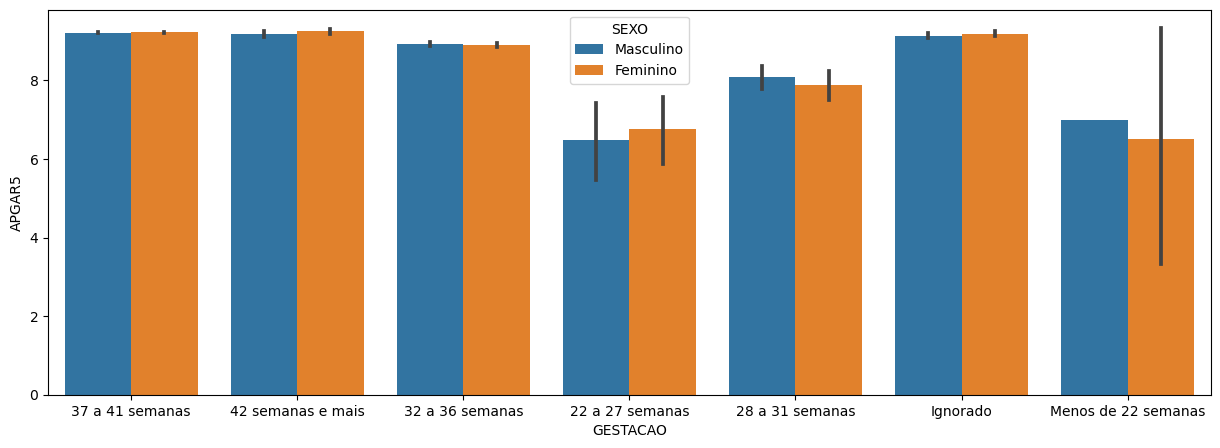

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df_sinasc_sel)

### 4.  Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas. <a name="tabela"></a>

<div style="text-align: right"
     
[Voltar ao índice](#questoes)

In [42]:
"""
Primeiro utilizando 'APGAR5'
"""
df_sinasc_cross_ap = pd.crosstab(df_sinasc_sel['GESTACAO'],df_sinasc_sel['APGAR5'])
df_sinasc_cross_ap

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,1,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,44,151,1417,13564,7283
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Ignorado,1,2,2,1,2,5,7,7,86,704,399
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


In [45]:
"""
Depois utilizando 'CLASSIFICACAOAPGAR'
"""
df_sinasc_cross_cl = pd.crosstab(df_sinasc_sel['GESTACAO'],df_sinasc_sel['CLASSIFICACAOAPGAR'])
df_sinasc_cross_cl

CLASSIFICACAOAPGAR,Asfixia leve,Asfixia moderada,Asfixia severa,Normal
GESTACAO,,,,
22 a 27 semanas,12,1,21,51
28 a 31 semanas,18,12,3,129
32 a 36 semanas,73,19,7,2134
37 a 41 semanas,195,28,33,22264
42 semanas e mais,6,1,1,690
Ignorado,14,7,6,1189
Menos de 22 semanas,1,0,2,4


### 5.  Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado. <a name="percent"></a>

<div style="text-align: right"
     
[Voltar ao índice](#questoes)

In [52]:
"""
Primeiro utilizando 'APGAR5'
"""
pd.set_option('display.precision', 2)
df_sinasc_cross_perc_ap= df_sinasc_cross_ap.apply(lambda r: r/r.sum(), axis=1) * 100
df_sinasc_cross_perc_ap

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.24,0.00,9.41,7.06,1.18,0.00,2.35,11.76,28.24,22.35,9.41
28 a 31 semanas,0.00,0.00,1.23,0.62,3.09,4.32,4.32,6.79,37.65,33.95,8.02
32 a 36 semanas,0.09,0.09,0.04,0.09,0.36,0.49,0.76,2.51,16.21,58.53,20.82
37 a 41 semanas,0.02,0.09,0.01,0.02,0.03,0.09,0.20,0.67,6.29,60.23,32.34
42 semanas e mais,0.14,0.00,0.00,0.00,0.00,0.14,0.14,0.72,6.30,60.60,31.95
Ignorado,0.08,0.16,0.16,0.08,0.16,0.41,0.58,0.58,7.07,57.89,32.81
Menos de 22 semanas,14.29,0.00,14.29,0.00,0.00,0.00,0.00,14.29,0.00,42.86,14.29


In [53]:
"""
Depois utilizando 'CLASSIFICACAOAPGAR'
"""
pd.set_option('display.precision', 2)
df_sinasc_cross_perc_cl = df_sinasc_cross_cl.apply(lambda r: r/r.sum(), axis=1) * 100
df_sinasc_cross_perc_cl

CLASSIFICACAOAPGAR,Asfixia leve,Asfixia moderada,Asfixia severa,Normal
GESTACAO,,,,
22 a 27 semanas,14.12,1.18,24.71,60.00
28 a 31 semanas,11.11,7.41,1.85,79.63
32 a 36 semanas,3.27,0.85,0.31,95.57
37 a 41 semanas,0.87,0.12,0.15,98.86
42 semanas e mais,0.86,0.14,0.14,98.85
Ignorado,1.15,0.58,0.49,97.78
Menos de 22 semanas,14.29,0.00,28.57,57.14


### 6.  Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos. <a name="insght"></a>

<div style="text-align: right"
     
[Voltar ao índice](#questoes)

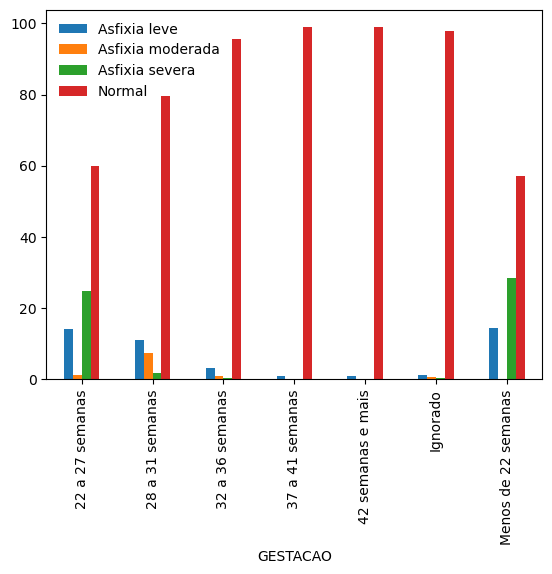

In [54]:
df_sinasc_cross_perc_cl.plot(kind='bar').legend(loc='upper left', frameon = False)

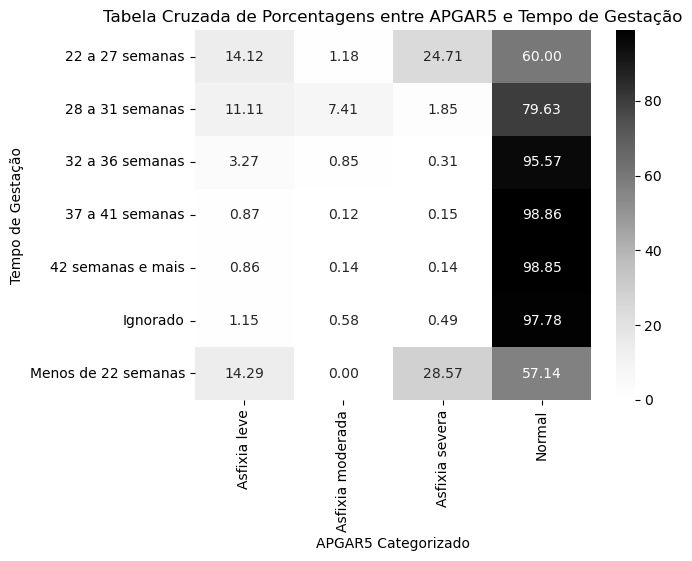

In [55]:
sns.heatmap(df_sinasc_cross_perc_cl, annot=True, fmt=".2f", cmap="Greys")
plt.xlabel('APGAR5 Categorizado')
plt.ylabel('Tempo de Gestação')
plt.title('Tabela Cruzada de Porcentagens entre APGAR5 e Tempo de Gestação')
plt.show()

#### Verificamos que a acima de 37 semanas casos de asfixia são irrisorios e abaixo disso eles aumentam substancialmente  corroborando assim a tese dos medicos de parto prematuros.


### 7. Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente. <a name="relacao"></a>

<div style="text-align: right"
     
[Voltar ao índice](#questoes)

C:\Users\Natanael_Quintiliano\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


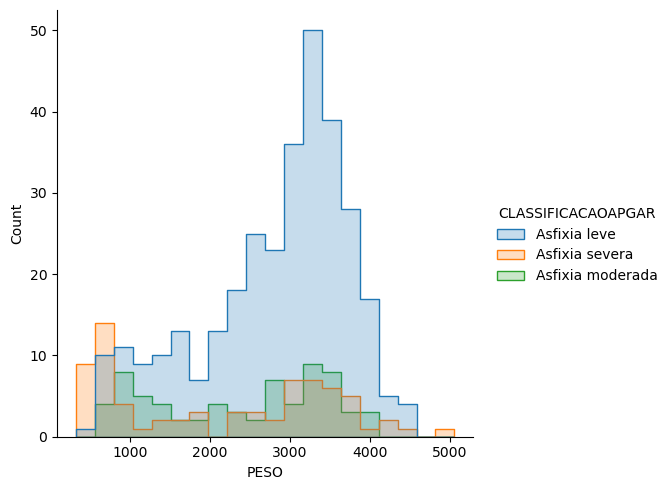

In [63]:
"""
Primeiro retirei todos os partes normais, assim todos os que tiveram algum tipo de asfixicia serão mais facilemnte vistos.
"""
df_sinasc_apgar = df_sinasc_sel[(df_sinasc_sel.APGAR5<8)]

sns.displot(data = df_sinasc_apgar
            ,x = 'PESO'
            ,hue = 'CLASSIFICACAOAPGAR'
            ,bins = 20
            ,element = 'step'
           )